In [1]:
# 데이터 구성:Series, DataFrame
import pandas as pd
# 데이터 시각화
import matplotlib.pyplot as plt
import matplotlib

# 데이터 분할:train, test
from sklearn.model_selection import train_test_split
# 분류 Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier
# 최적 모델, 파라미터 탐색
from sklearn.model_selection import GridSearchCV

# 분류모델 평가 함수
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
plt.rcParams['font.family'] = 'NanumGothic'
matplotlib.rcParams['axes.unicode_minus'] = False

In [3]:
# 데이터 불러오기
df_raw = pd.read_csv("../실습파일/2. Big Data 분석/HMEQ.csv")
df_raw.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1700,30548,40320.0,HomeImp,Other,9.0,0,0.0,101.466002,1.0,8,37.113614
1,1,1800,28502,43034.0,HomeImp,Other,11.0,0,0.0,88.766030,0.0,8,36.884894
2,0,2300,102370,120953.0,HomeImp,Office,2.0,0,0.0,90.992533,0.0,13,31.588503
3,1,2400,34863,47471.0,HomeImp,Mgr,12.0,0,0.0,70.491080,1.0,21,38.263601
4,0,2400,98449,117195.0,HomeImp,Office,4.0,0,0.0,93.811775,0.0,13,29.681827


In [4]:
# Data 구조 확인
print("Data 구조:", df_raw.shape)
print()
print("변수 : ", df_raw.columns)

Data 구조: (3748, 13)

변수 :  Index(['BAD', 'LOAN', 'MORTDUE', 'VALUE', 'REASON', 'JOB', 'YOJ', 'DEROG',
       'DELINQ', 'CLAGE', 'NINQ', 'CLNO', 'DEBTINC'],
      dtype='object')


In [5]:
# 결측치 확인
df_raw.isnull().sum(axis = 0)

# 결측치 없음

BAD          0
LOAN         0
MORTDUE      0
VALUE       14
REASON       0
JOB         81
YOJ        205
DEROG        0
DELINQ      30
CLAGE       37
NINQ        56
CLNO         0
DEBTINC      0
dtype: int64

In [6]:
# fillna: 결측치를 채우는 함수
# JOB 변수의 결측치는 Other로 입력, inplace: fillna 함수 적용 후 ds_hmeq 데이터에 저장, False면 저장 안 함
df_raw["JOB"].fillna("Other", inplace = True)

# 숫자형 변수의 결측치는 해당 변수의 평균값 입력: ds_hmeq.mean() 각 변수별 평균 계산 후 결측치 대체
df_raw.fillna(df_raw.mean(), inplace=True)

/tmp/ipykernel_22821/302979641.py:6: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_raw.fillna(df_raw.mean(), inplace=True)


In [7]:
# 결측치 재확인
df_raw.isnull().sum()

BAD        0
LOAN       0
MORTDUE    0
VALUE      0
REASON     0
JOB        0
YOJ        0
DEROG      0
DELINQ     0
CLAGE      0
NINQ       0
CLNO       0
DEBTINC    0
dtype: int64

In [8]:
# get_dummies: 데이터의 문자형 변수에 대한 더미변수 생성 
df_raw_dummy = pd.get_dummies(df_raw)
df_raw_dummy.head()

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,REASON_DebtCon,REASON_HomeImp,JOB_Mgr,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self
0,1,1700,30548,40320.0,9.0,0,0.0,101.466002,1.0,8,37.113614,0,1,0,0,1,0,0,0
1,1,1800,28502,43034.0,11.0,0,0.0,88.766030,0.0,8,36.884894,0,1,0,0,1,0,0,0
2,0,2300,102370,120953.0,2.0,0,0.0,90.992533,0.0,13,31.588503,0,1,0,1,0,0,0,0
3,1,2400,34863,47471.0,12.0,0,0.0,70.491080,1.0,21,38.263601,0,1,1,0,0,0,0,0
4,0,2400,98449,117195.0,4.0,0,0.0,93.811775,0.0,13,29.681827,0,1,0,1,0,0,0,0


In [9]:
# 설명변수, 목표변수 데이터 구분
df_raw_x = df_raw_dummy.drop("BAD", axis = 1, inplace = False)
df_raw_y = df_raw_dummy["BAD"] 

In [10]:
# 데이터 분할 train_test_split(X: 설명변수, Y: 목표변수, test_size = test 데이터 비율)
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(
    df_raw_x, df_raw_y, test_size = 0.3, random_state = 1234) 

print("분할 전 설명변수 데이터 :", df_raw_x.shape)
print("분할 후 설명변수 데이터 :Train", df_train_x.shape, "  Test",df_test_x.shape)

분할 전 설명변수 데이터 : (3748, 18)
분할 후 설명변수 데이터 :Train (2623, 18)   Test (1125, 18)


In [11]:
display(df_raw.head(10))
display(df_raw_x.head(10))

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1700,30548,40320.0,HomeImp,Other,9.0,0,0.0,101.466002,1.0,8,37.113614
1,1,1800,28502,43034.0,HomeImp,Other,11.0,0,0.0,88.766030,0.0,8,36.884894
2,0,2300,102370,120953.0,HomeImp,Office,2.0,0,0.0,90.992533,0.0,13,31.588503
3,1,2400,34863,47471.0,HomeImp,Mgr,12.0,0,0.0,70.491080,1.0,21,38.263601
4,0,2400,98449,117195.0,HomeImp,Office,4.0,0,0.0,93.811775,0.0,13,29.681827
5,0,2900,103949,112505.0,HomeImp,Office,1.0,0,0.0,96.102330,0.0,13,30.051136
6,0,2900,104373,120702.0,HomeImp,Office,2.0,0,0.0,101.540297,0.0,13,29.915859
7,1,2900,7750,67996.0,HomeImp,Other,16.0,3,0.0,122.204663,2.0,8,36.211348
8,1,2900,61962,70915.0,DebtCon,Mgr,2.0,0,0.0,282.801659,3.0,37,49.206396
9,0,3000,104570,121729.0,HomeImp,Office,2.0,0,0.0,85.884372,0.0,14,32.059783


,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,REASON_DebtCon,REASON_HomeImp,JOB_Mgr,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self
0,1700,30548,40320.0,9.0,0,0.0,101.466002,1.0,8,37.113614,0,1,0,0,1,0,0,0
1,1800,28502,43034.0,11.0,0,0.0,88.766030,0.0,8,36.884894,0,1,0,0,1,0,0,0
2,2300,102370,120953.0,2.0,0,0.0,90.992533,0.0,13,31.588503,0,1,0,1,0,0,0,0
3,2400,34863,47471.0,12.0,0,0.0,70.491080,1.0,21,38.263601,0,1,1,0,0,0,0,0
4,2400,98449,117195.0,4.0,0,0.0,93.811775,0.0,13,29.681827,0,1,0,1,0,0,0,0
5,2900,103949,112505.0,1.0,0,0.0,96.102330,0.0,13,30.051136,0,1,0,1,0,0,0,0
6,2900,104373,120702.0,2.0,0,0.0,101.540297,0.0,13,29.915859,0,1,0,1,0,0,0,0
7,2900,7750,67996.0,16.0,3,0.0,122.204663,2.0,8,36.211348,0,1,0,0,1,0,0,0
8,2900,61962,70915.0,2.0,0,0.0,282.801659,3.0,37,49.206396,1,0,1,0,0,0,0,0
9,3000,104570,121729.0,2.0,0,0.0,85.884372,0.0,14,32.059783,0,1,0,1,0,0,0,0


In [12]:
# Data 구조 확인
print("Data 구조:", df_raw_x.columns)
print()
print("변수 : ", df_train_x.columns)

Data 구조: Index(['LOAN', 'MORTDUE', 'VALUE', 'YOJ', 'DEROG', 'DELINQ', 'CLAGE', 'NINQ',
       'CLNO', 'DEBTINC', 'REASON_DebtCon', 'REASON_HomeImp', 'JOB_Mgr',
       'JOB_Office', 'JOB_Other', 'JOB_ProfExe', 'JOB_Sales', 'JOB_Self'],
      dtype='object')

변수 :  Index(['LOAN', 'MORTDUE', 'VALUE', 'YOJ', 'DEROG', 'DELINQ', 'CLAGE', 'NINQ',
       'CLNO', 'DEBTINC', 'REASON_DebtCon', 'REASON_HomeImp', 'JOB_Mgr',
       'JOB_Office', 'JOB_Other', 'JOB_ProfExe', 'JOB_Sales', 'JOB_Self'],
      dtype='object')


In [13]:
# 그래디언트 부스팅 모델 생성: GradientBoostingClassifier
gb_uncust = GradientBoostingClassifier(random_state=1234)
gb_uncust.fit(df_train_x, df_train_y)

# train 모델 정확도
print("Accuracy on training set: {:.3f}".format(gb_uncust.score (df_train_x, df_train_y)))
# test 모델 정확도
print("Accuracy on test set: {:.3f}".format(gb_uncust.score (df_test_x, df_test_y)))

Accuracy on training set: 0.963
Accuracy on test set: 0.941


In [14]:
# 실행옵션 확인
print(gb_uncust.get_params().keys())
print(gb_uncust.get_params().values())

dict_keys(['ccp_alpha', 'criterion', 'init', 'learning_rate', 'loss', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_iter_no_change', 'random_state', 'subsample', 'tol', 'validation_fraction', 'verbose', 'warm_start'])
dict_values([0.0, 'friedman_mse', None, 0.1, 'log_loss', 3, None, None, 0.0, 1, 2, 0.0, 100, None, 1234, 1.0, 0.0001, 0.1, 0, False])


In [15]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []
# learning_rate 학습률 변경
para_lr = [lr * 0.1 for lr in range(1, 10)]
# para_lr = [lr * 0.02 for lr in range(1, 20)]   # 민감하게 변화하면 0.02 간격으로 확인

for v_learning_rate in para_lr:
    gb = GradientBoostingClassifier(learning_rate = v_learning_rate, random_state = 1234)
    gb.fit(df_train_x, df_train_y)
    train_accuracy.append(gb.score(df_train_x, df_train_y))
    test_accuracy.append(gb.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_lr = pd.DataFrame()
df_accuracy_lr["LearningRate"] = para_lr
df_accuracy_lr["TrainAccuracy"] = train_accuracy
df_accuracy_lr["TestAccuracy"] = test_accuracy

In [16]:
para_lr

[0.1,
 0.2,
 0.30000000000000004,
 0.4,
 0.5,
 0.6000000000000001,
 0.7000000000000001,
 0.8,
 0.9]

In [17]:
# LearningRate별 정확도 
df_accuracy_lr.round(3)

,LearningRate,TrainAccuracy,TestAccuracy
0,0.1,0.963,0.941
1,0.2,0.984,0.940
2,0.3,0.994,0.939
3,0.4,0.999,0.944
4,0.5,1.000,0.934
5,0.6,1.000,0.937
6,0.7,1.000,0.941
7,0.8,0.999,0.931
8,0.9,1.000,0.937


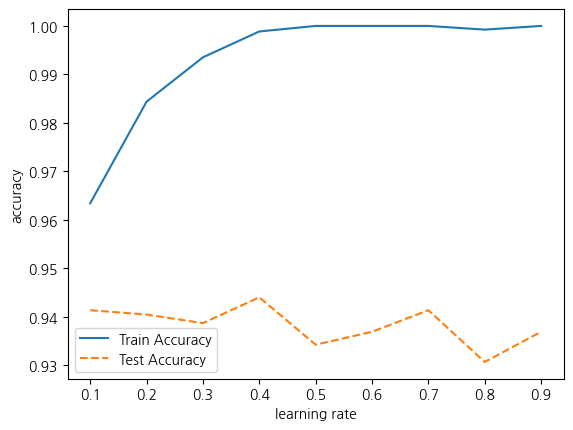

In [18]:
# LearningRate별 정확도 그래프 확인
plt.plot(para_lr, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_lr, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.ylabel("accuracy"); plt.xlabel("learning rate")
plt.legend()

In [19]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []
# n_estimatos: 트리 수 변경
para_n_tree = [n_tree * 10 for n_tree in range(1, 16)]

for v_n_estimators in para_n_tree:
    gb = GradientBoostingClassifier(n_estimators = v_n_estimators, learning_rate=0.1, random_state=1234)
    gb.fit(df_train_x, df_train_y)
    train_accuracy.append(gb.score(df_train_x, df_train_y))
    test_accuracy.append(gb.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_n = pd.DataFrame()
df_accuracy_n["Estimators"] = para_n_tree
df_accuracy_n["TrainAccuracy"] = train_accuracy
df_accuracy_n["TestAccuracy"] = test_accuracy

In [20]:
para_n_tree

[10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150]

In [21]:
# n_estimators별 정확도 
df_accuracy_n.round(3)

,Estimators,TrainAccuracy,TestAccuracy
0,10,0.933,0.928
1,20,0.939,0.932
2,30,0.947,0.936
3,40,0.952,0.940
4,50,0.956,0.940
5,60,0.957,0.940
6,70,0.957,0.939
7,80,0.960,0.939
8,90,0.961,0.940
9,100,0.963,0.941


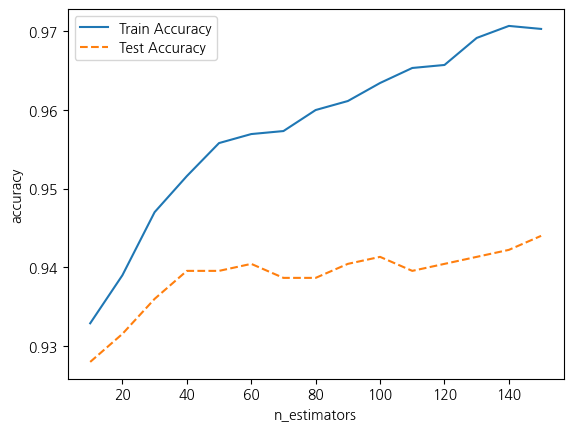

In [22]:
# 정확도를 그래프 확인
plt.plot(para_n_tree, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_n_tree, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.ylabel("accuracy"); plt.xlabel("n_estimators")
plt.legend()

In [23]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []
# max_depth: 최대 깊이 변경. 1~10
para_depth = [depth for depth in range(1, 11)]

for v_max_depth in para_depth:
    gb = GradientBoostingClassifier(max_depth = v_max_depth,
                            n_estimators=100, learning_rate=0.1, random_state=1234)
    gb.fit(df_train_x, df_train_y)
    train_accuracy.append(gb.score(df_train_x, df_train_y))
    test_accuracy.append(gb.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_depth = pd.DataFrame()
df_accuracy_depth["Depth"] = para_depth
df_accuracy_depth["TrainAccuracy"] = train_accuracy
df_accuracy_depth["TestAccuracy"] = test_accuracy

In [24]:
para_depth

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [25]:
# max_depth별 정확도
df_accuracy_depth.round(3)

,Depth,TrainAccuracy,TestAccuracy
0,1,0.936,0.935
1,2,0.951,0.940
2,3,0.963,0.941
3,4,0.979,0.945
4,5,0.990,0.940
5,6,0.998,0.950
6,7,1.000,0.947
7,8,1.000,0.948
8,9,1.000,0.948
9,10,1.000,0.947


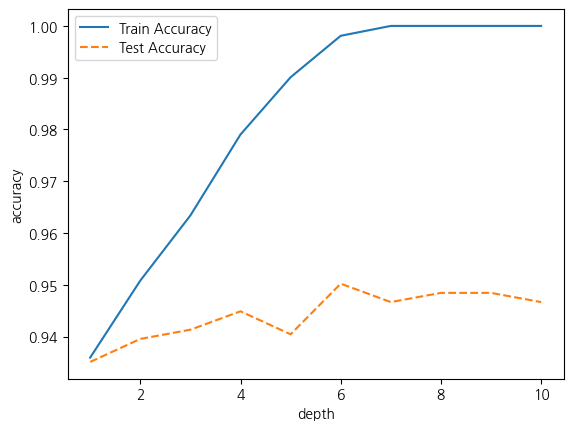

In [26]:
# 정확도를 그래프 확인
plt.plot(para_depth, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_depth, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.ylabel("accuracy"); plt.xlabel("depth")
plt.legend()

In [27]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []
# min_samples_split: 분할하기 위한 노드의 최소 샘플 수. 20~100
para_split = [n_split * 10 for n_split in range(2, 11)]

for v_min_samples_split in para_split:
    gb = GradientBoostingClassifier(min_samples_split = v_min_samples_split,
                                    max_depth=6, n_estimators=100, learning_rate=0.1, random_state=1234)
    gb.fit(df_train_x, df_train_y)
    train_accuracy.append(gb.score(df_train_x, df_train_y))
    test_accuracy.append(gb.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_split = pd.DataFrame()
df_accuracy_split["MinSamplesSplit"] = para_split
df_accuracy_split["TrainAccuracy"] = train_accuracy
df_accuracy_split["TestAccuracy"] = test_accuracy

In [28]:
para_split

[20, 30, 40, 50, 60, 70, 80, 90, 100]

In [29]:
# min_samples_leaf별 정확도 
df_accuracy_split.round(3)

,MinSamplesSplit,TrainAccuracy,TestAccuracy
0,20,0.995,0.942
1,30,0.994,0.940
2,40,0.992,0.945
3,50,0.992,0.942
4,60,0.989,0.947
5,70,0.988,0.943
6,80,0.986,0.944
7,90,0.987,0.945
8,100,0.984,0.944


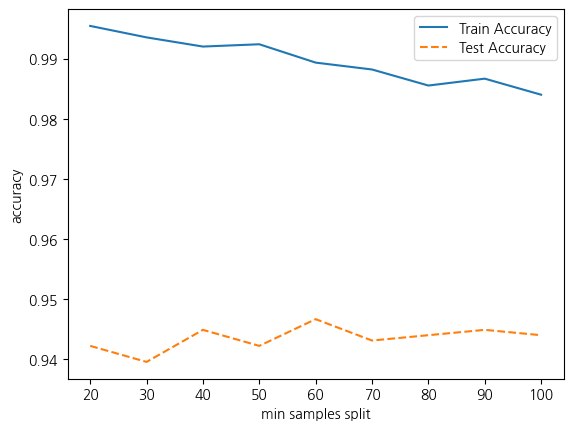

In [30]:
# 정확도를 그래프 확인
plt.plot(para_split, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_split, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.ylabel("accuracy"); plt.xlabel("min samples split")
plt.legend()

In [31]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []
# min_samples_leaf: 잎사귀 노드 최소 자료 수. 5~50
para_leaf = [n_leaf * 5 for n_leaf in range(1, 11)]

for v_min_samples_leaf in para_leaf:
    gb = GradientBoostingClassifier(min_samples_leaf = v_min_samples_leaf,
                                     max_depth=6, n_estimators=100, learning_rate=0.1, random_state=1234)
    gb.fit(df_train_x, df_train_y)
    train_accuracy.append(gb.score(df_train_x, df_train_y))
    test_accuracy.append(gb.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_leaf = pd.DataFrame()
df_accuracy_leaf["MinSamplesLeaf"] = para_leaf
df_accuracy_leaf["TrainAccuracy"] = train_accuracy
df_accuracy_leaf["TestAccuracy"] = test_accuracy

In [32]:
para_leaf

[5, 10, 15, 20, 25, 30, 35, 40, 45, 50]

In [33]:
# min_samples_leaf별 정확도 
df_accuracy_leaf.round(3)

,MinSamplesLeaf,TrainAccuracy,TestAccuracy
0,5,0.998,0.943
1,10,0.995,0.948
2,15,0.991,0.949
3,20,0.990,0.948
4,25,0.987,0.945
5,30,0.984,0.943
6,35,0.984,0.943
7,40,0.982,0.944
8,45,0.982,0.943
9,50,0.978,0.943


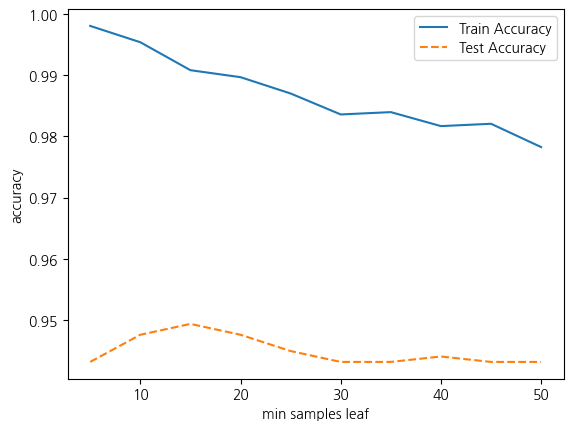

In [34]:
# 정확도를 그래프 확인
plt.plot(para_leaf, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_leaf, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.ylabel("accuracy"); plt.xlabel("min samples leaf")
plt.legend()

In [35]:
# 최종 모델
gb_final = GradientBoostingClassifier(min_samples_leaf=15, max_depth=6, n_estimators=100, learning_rate=0.1, 
                                      random_state=1234)
gb_final.fit(df_train_x, df_train_y)
# 예측
y_pred = gb_final.predict(df_test_x)

# train 모델 정확도
print("Train Accuracy: {:.3f}".format(gb_final.score(df_train_x, df_train_y)))
# test 모델 정확도
print("Test Accuracy: {:.3f}\n".format(gb_final.score(df_test_x, df_test_y)))
# confusion matrix
print("Test Confusion matrix: \n{}".format(confusion_matrix(df_test_y, y_pred)))

# 목표변수의 빈도 불균형 : f1 score로 모델 평가 
print(classification_report(df_test_y, y_pred, digits=3))

Train Accuracy: 0.991
Test Accuracy: 0.949

Test Confusion matrix: 
[[1020    1]
 [  56   48]]
              precision    recall  f1-score   support

           0      0.948     0.999     0.973      1021
           1      0.980     0.462     0.627       104

    accuracy                          0.949      1125
   macro avg      0.964     0.730     0.800      1125
weighted avg      0.951     0.949     0.941      1125



In [36]:
# 변수명
v_feature_name = df_train_x.columns
# tree.feature_importances_로 설명변수 중요도 확인 및 테이블로 저장
df_importance = pd.DataFrame()
df_importance ["Feature"] = v_feature_name
df_importance ["Importance"] = gb_final.feature_importances_
# df_feature_importance의 테이블을 중요도별로 정렬
df_importance .sort_values("Importance", ascending=False, inplace = True)
df_importance .round(3)

,Feature,Importance
9,DEBTINC,0.331
6,CLAGE,0.132
2,VALUE,0.105
5,DELINQ,0.096
8,CLNO,0.076
0,LOAN,0.069
3,YOJ,0.048
7,NINQ,0.041
1,MORTDUE,0.037
4,DEROG,0.035


Text(0, 0.5, '설명변수')

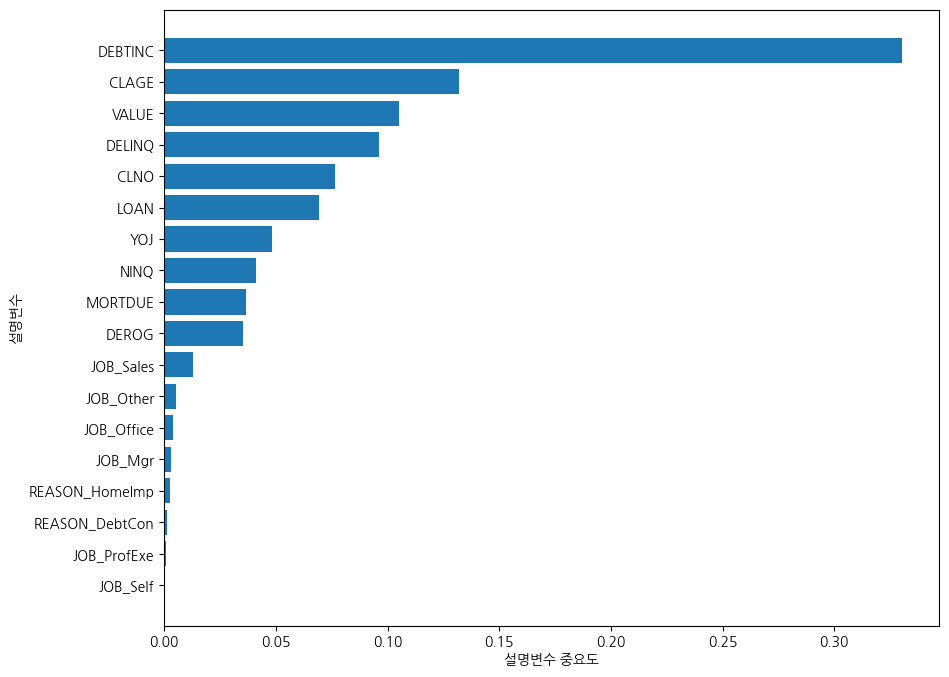

In [37]:
# 설명변수 중요도 그래프
# 중요도가 높은 변수를 상위에 그림 
fig, ax = plt.subplots(figsize=(10, 8))

df_importance .sort_values("Importance", ascending=True, inplace = True)
coordinates = range(len(df_importance ))
plt.barh(y = coordinates, width = df_importance ["Importance"])
plt.yticks(coordinates, df_importance ["Feature"])
plt.xlabel("설명변수 중요도")
plt.ylabel("설명변수")

In [38]:
# xgboost 패키지 불러오기 
from xgboost import XGBClassifier

# 변수 중요도 확인: F1 점수 기준
from xgboost import plot_importance

# 분류모델 통합 평가: 혼동행렬, 정확도, 정밀도, 재현율, F1, AUC 등
def eval_class_model(y_test, y_pred):
    confusion = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    F1 = f1_score(y_test, y_pred)
    AUC = roc_auc_score(y_test, y_pred)
    
    print('오차행렬:\n', confusion, '\n')
    print('정확도: {:.4f}'.format(accuracy))
    print('정밀도: {:.4f}'.format(precision))
    print('재현율: {:.4f}'.format(recall))
    print('F1    : {:.4f}'.format(F1))
    print('AUC   : {:.4f}'.format(AUC))


In [39]:
# 기본 모델 지정 및 기본 옵션 확인
xgboost_uncust = XGBClassifier(random_state=1234)

xgboost_uncust
# xgboost_uncust.get_params()

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=1234, ...)

In [40]:
# 모델 적합
xgboost_uncust.fit(df_train_x, df_train_y)

print('\n 모델 생성 및 평가 : Train \n')
# 예측 및 모델 평가:train  
xgb_pred_train = xgboost_uncust.predict(df_train_x)
# 모델 평가
eval_class_model(df_train_y, xgb_pred_train)

print('\n 모델 생성 및 평가 : Test \n')
# 예측 및 모델 평가:test 
xgb_pred_test = xgboost_uncust.predict(df_test_x)
# 모델 평가
eval_class_model(df_test_y, xgb_pred_test)


 모델 생성 및 평가 : Train 

오차행렬:
 [[2382    0]
 [   0  241]] 

정확도: 1.0000
정밀도: 1.0000
재현율: 1.0000
F1    : 1.0000
AUC   : 1.0000

 모델 생성 및 평가 : Test 

오차행렬:
 [[1019    2]
 [  58   46]] 

정확도: 0.9467
정밀도: 0.9583
재현율: 0.4423
F1    : 0.6053
AUC   : 0.7202


In [41]:
# 사용자 모델 생성
xgboost_user= XGBClassifier(n_estimators = 100, learning_rate = 0.1, max_depth = 5, random_state=1234)
# 모델 적합
xgboost_user.fit(df_train_x, df_train_y)

# 예측 및 모델 평가:Train  
xgb_pred_train = xgboost_user.predict(df_train_x)

print('\n 사용자 모델 평가 : Train \n')
eval_class_model(df_train_y, xgb_pred_train)
print('\n',classification_report(df_train_y, xgb_pred_train))


# 예측 및 모델 평가:Test  
xgb_pred_test = xgboost_user.predict(df_test_x)

print('\n 사용자 모델 평가 : Test \n')
eval_class_model(df_test_y, xgb_pred_test)
print('\n',classification_report(df_test_y, xgb_pred_test))


 사용자 모델 평가 : Train 

오차행렬:
 [[2382    0]
 [  46  195]] 

정확도: 0.9825
정밀도: 1.0000
재현율: 0.8091
F1    : 0.8945
AUC   : 0.9046

               precision    recall  f1-score   support

           0       0.98      1.00      0.99      2382
           1       1.00      0.81      0.89       241

    accuracy                           0.98      2623
   macro avg       0.99      0.90      0.94      2623
weighted avg       0.98      0.98      0.98      2623


 사용자 모델 평가 : Test 

오차행렬:
 [[1020    1]
 [  62   42]] 

정확도: 0.9440
정밀도: 0.9767
재현율: 0.4038
F1    : 0.5714
AUC   : 0.7014

               precision    recall  f1-score   support

           0       0.94      1.00      0.97      1021
           1       0.98      0.40      0.57       104

    accuracy                           0.94      1125
   macro avg       0.96      0.70      0.77      1125
weighted avg       0.95      0.94      0.93      1125



In [42]:
# sklearn XGBoost 모델의 조기 중단:fit( )에 파라미터 입력(early_stopping_rounds, eval_metrics, eval_set.)
# 모델 파라미터 지정:n_estimators, learning_rate, max_depth 등 지정
# 조기 중간 파라미터 지정: early_stopping_rounds 
# 평가지표 지정:logloss

# 모델 성능 평가 데이터
eval_df = [(df_test_x, df_test_y)]

xgb_stop = XGBClassifier(n_estimators = 300, learning_rate = 0.1 , max_depth = 6, random_state=1234)
xgb_stop.fit(df_train_x, df_train_y, 
            # 조기 중단 파라미터
             early_stopping_rounds = 150, eval_metric="logloss", eval_set = eval_df, verbose=True)

[0]	validation_0-logloss:0.31300
[1]	validation_0-logloss:0.29951
[2]	validation_0-logloss:0.28564
[3]	validation_0-logloss:0.27432
[4]	validation_0-logloss:0.26602


[5]	validation_0-logloss:0.25832
[6]	validation_0-logloss:0.25171
[7]	validation_0-logloss:0.24595
[8]	validation_0-logloss:0.24093
[9]	validation_0-logloss:0.23525
[10]	validation_0-logloss:0.23157
[11]	validation_0-logloss:0.22807
[12]	validation_0-logloss:0.22469
[13]	validation_0-logloss:0.22092
[14]	validation_0-logloss:0.21890
[15]	validation_0-logloss:0.21594
[16]	validation_0-logloss:0.21422
[17]	validation_0-logloss:0.21245
[18]	validation_0-logloss:0.21037
[19]	validation_0-logloss:0.20906
[20]	validation_0-logloss:0.20771
[21]	validation_0-logloss:0.20605
[22]	validation_0-logloss:0.20554
[23]	validation_0-logloss:0.20450
[24]	validation_0-logloss:0.20376
[25]	validation_0-logloss:0.20290
[26]	validation_0-logloss:0.20211
[27]	validation_0-logloss:0.20145
[28]	validation_0-logloss:0.20125
[29]	validation_0-logloss:0.20066
[30]	validation_0-logloss:0.20023
[31]	validation_0-logloss:0.20001
[32]	validation_0-logloss:0.19897
[33]	validation_0-logloss:0.19822
[34]	validation_0-l

/home/piai/anaconda3/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/home/piai/anaconda3/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[36]	validation_0-logloss:0.19789
[37]	validation_0-logloss:0.19644
[38]	validation_0-logloss:0.19552
[39]	validation_0-logloss:0.19532
[40]	validation_0-logloss:0.19463
[41]	validation_0-logloss:0.19440
[42]	validation_0-logloss:0.19328
[43]	validation_0-logloss:0.19263
[44]	validation_0-logloss:0.19256
[45]	validation_0-logloss:0.19223
[46]	validation_0-logloss:0.19168
[47]	validation_0-logloss:0.19153
[48]	validation_0-logloss:0.19207
[49]	validation_0-logloss:0.19190
[50]	validation_0-logloss:0.19201
[51]	validation_0-logloss:0.19205
[52]	validation_0-logloss:0.19183
[53]	validation_0-logloss:0.19165
[54]	validation_0-logloss:0.19141
[55]	validation_0-logloss:0.19081
[56]	validation_0-logloss:0.19072
[57]	validation_0-logloss:0.19061
[58]	validation_0-logloss:0.19052
[59]	validation_0-logloss:0.18974
[60]	validation_0-logloss:0.18974
[61]	validation_0-logloss:0.18963
[62]	validation_0-logloss:0.18975
[63]	validation_0-logloss:0.18989
[64]	validation_0-logloss:0.18948
[65]	validatio

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, random_state=1234, ...)

In [43]:
# 최적 모델 정보 확인
print("최적 횟수:",xgb_stop.best_iteration)  
print("최적 성능(0-LogLoss):",xgb_stop.best_score)  

최적 횟수: 65
최적 성능(0-LogLoss): 0.1891167553178966


In [44]:
# 최적 모델 평가
xgb_pred_stop = xgb_stop.predict(df_test_x)

print('\n 조기 중단 모델 평가 : Test \n')
eval_class_model(df_test_y, xgb_pred_stop)
print('\n',classification_report(df_test_y, xgb_pred_stop))


 조기 중단 모델 평가 : Test 

오차행렬:
 [[1020    1]
 [  65   39]] 

정확도: 0.9413
정밀도: 0.9750
재현율: 0.3750
F1    : 0.5417
AUC   : 0.6870

               precision    recall  f1-score   support

           0       0.94      1.00      0.97      1021
           1       0.97      0.38      0.54       104

    accuracy                           0.94      1125
   macro avg       0.96      0.69      0.76      1125
weighted avg       0.94      0.94      0.93      1125



{'LOAN': 506.0, 'MORTDUE': 441.0, 'VALUE': 484.0, 'YOJ': 371.0, 'DEROG': 113.0, 'DELINQ': 177.0, 'CLAGE': 497.0, 'NINQ': 146.0, 'CLNO': 485.0, 'DEBTINC': 541.0, 'REASON_DebtCon': 54.0, 'JOB_Mgr': 14.0, 'JOB_Office': 44.0, 'JOB_Other': 57.0, 'JOB_ProfExe': 39.0, 'JOB_Sales': 45.0}


<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

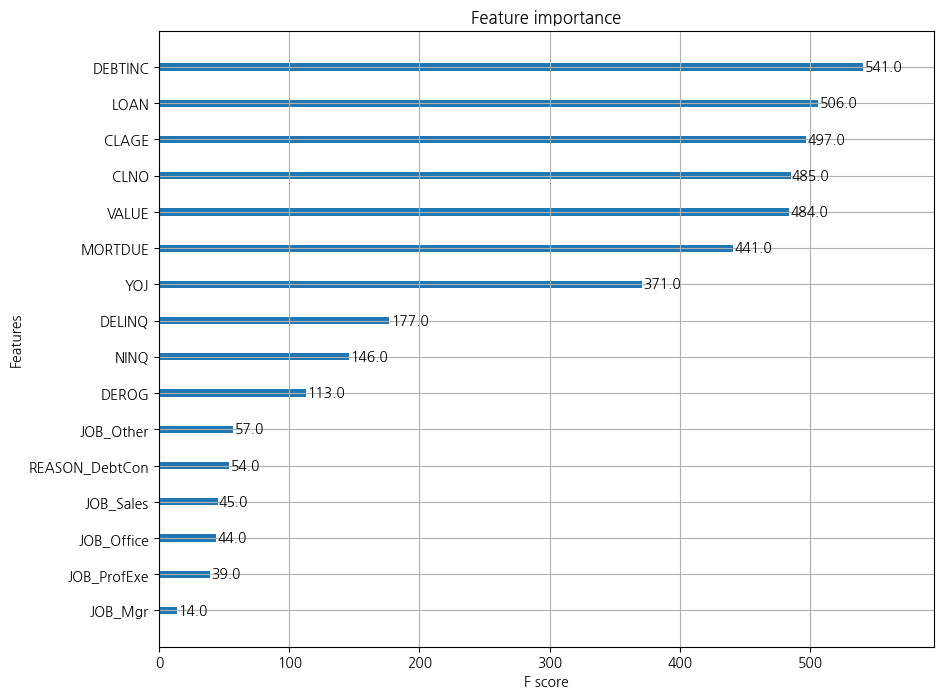

In [45]:
# 변수 중요도 확인 
from xgboost import plot_importance  # F1 score 기준으로 변수 중요도 표시(변경 가능)
print(xgb_stop.get_booster().get_fscore())

fig, ax = plt.subplots(figsize=(10, 8))
plot_importance(xgb_stop, ax=ax)

In [58]:
# LightGBM 패키지 불러오기 
from lightgbm import LGBMClassifier

# 변수 중요도 확인: F1 점수 기준
from lightgbm import plot_importance

# 분류모델 통합 평가: 혼동행렬, 정확도, 정밀도, 재현율, F1, AUC 등
def eval_class_model(y_test, y_pred):
    confusion = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    F1 = f1_score(y_test, y_pred)
    AUC = roc_auc_score(y_test, y_pred)
    
    print('오차행렬:\n', confusion, '\n')
    print('정확도: {:.4f}'.format(accuracy))
    print('정밀도: {:.4f}'.format(precision))
    print('재현율: {:.4f}'.format(recall))
    print('F1    : {:.4f}'.format(F1))
    print('AUC   : {:.4f}'.format(AUC))

In [59]:
# 기본 모델 지정 및 기본 옵션 확인
lgbm_uncust = LGBMClassifier(random_state=1234)

lgbm_uncust.get_params()

{'boosting_type': 'gbdt',
 'class_weight': None,
 'colsample_bytree': 1.0,
 'importance_type': 'split',
 'learning_rate': 0.1,
 'max_depth': -1,
 'min_child_samples': 20,
 'min_child_weight': 0.001,
 'min_split_gain': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'num_leaves': 31,
 'objective': None,
 'random_state': 1234,
 'reg_alpha': 0.0,
 'reg_lambda': 0.0,
 'subsample': 1.0,
 'subsample_for_bin': 200000,
 'subsample_freq': 0}

In [60]:
# 모델 적합
lgbm_uncust.fit(df_train_x, df_train_y)
print('\n 모델 생성 및 평가 : Train \n')
# 예측 및 모델 평가:train  
lgbm_pred_train = lgbm_uncust.predict(df_train_x)
eval_class_model(df_train_y, lgbm_pred_train)
print('\n 모델 생성 및 평가 : Test \n')
# 예측 및 모델 평가:test 
lgbm_pred_test = lgbm_uncust.predict(df_test_x)
eval_class_model(df_test_y, lgbm_pred_test)

[LightGBM] [Info] Number of positive: 241, number of negative: 2382
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000935 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1411
[LightGBM] [Info] Number of data points in the train set: 2623, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.091880 -> initscore=-2.290899
[LightGBM] [Info] Start training from score -2.290899

 모델 생성 및 평가 : Train 

오차행렬:
 [[2382    0]
 [   0  241]] 

정확도: 1.0000
정밀도: 1.0000
재현율: 1.0000
F1    : 1.0000
AUC   : 1.0000

 모델 생성 및 평가 : Test 

오차행렬:
 [[1019    2]
 [  59   45]] 

정확도: 0.9458
정밀도: 0.9574
재현율: 0.4327
F1    : 0.5960
AUC   : 0.7154


In [62]:
# 사용자 모델 생성
lgbm_user= LGBMClassifier(n_estimators = 100, learning_rate = 0.1, max_depth = 6, random_state=1234)
# 모델 적합
lgbm_user.fit(df_train_x, df_train_y)

# 예측 및 모델 평가:Train  
lgbm_pred_train = lgbm_user.predict(df_train_x)

print('\n 사용자 모델 평가 : Train \n')
eval_class_model(df_train_y, lgbm_pred_train)
print('\n',classification_report(df_train_y, lgbm_pred_train))

# 예측 및 모델 평가:Test  
lgbm_pred_test = lgbm_user.predict(df_test_x)

print('\n 사용자 모델 평가 : Test \n')
eval_class_model(df_test_y, lgbm_pred_test)
print('\n',classification_report(df_test_y, lgbm_pred_test))

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 241, number of negative: 2382
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001125 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1411
[LightGBM] [Info] Number of data points in the train set: 2623, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.091880 -> initscore=-2.290899
[LightGBM] [Info] Start training from score -2.290899
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

In [66]:
from lightgbm import early_stopping
eval_df = [(df_test_x, df_test_y)]

lgbm_stop = LGBMClassifier(n_estimators = 300, learning_rate = 0.1, max_depth = 6, random_state=1234)
# lgbm_stop = LGBMClassifier(n_estimators = 300, learning_rate = 0.1, max_depth = 6,
#                           reg_alpha=0.2)

# 모델 성능 평가 데이터
lgbm_stop.fit(df_train_x, df_train_y, 
              # 조기 중단 파라미터
              callbacks=[early_stopping(stopping_rounds=200)] , eval_metric="logloss", eval_set = eval_df)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 241, number of negative: 2382
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001227 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1411
[LightGBM] [Info] Number of data points in the train set: 2623, number of used features: 18
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.091880 -> initscore=-2.290899
[LightGBM] [Info] Start training from score -2.290899
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improv

LGBMClassifier(max_depth=6, n_estimators=300, random_state=1234)

In [67]:
# 최적모델 정보 확인
print("최적 횟수:",lgbm_stop.best_iteration_)  
print("최적 성능(0-LogLoss):",lgbm_stop.best_score_)  

최적 횟수: 82
최적 성능(0-LogLoss): defaultdict(<class 'collections.OrderedDict'>, {'valid_0': OrderedDict([('binary_logloss', 0.18328102516450842)])})


In [68]:
# 참조!!! 모델 결과 확인
print(lgbm_stop.boosting_type)  # gbdt
print(lgbm_stop.class_weight)  # None
print(lgbm_stop.classes_)  # [0 1]
print(lgbm_stop.colsample_bytree)  # 1.0
# print(lgbm_stop.evals_result_)  # {'valid_0': OrderedDict([('binary_logloss', [0.28510

# print(lgbm_stop.evals_result_)  # 
print(lgbm_stop.feature_name_)  # 
print(lgbm_stop.feature_importances_)  # 

print(lgbm_stop.fit)  # <bound method LGBMClassifier.fit of LGBMClassifier(max_depth=6, n_estimators=300)>
print(lgbm_stop.fitted_)  # True
print(lgbm_stop.importance_type)  # split


print(lgbm_stop.learning_rate)  # 0.1
print(lgbm_stop.min_child_samples)  # 20 
print(lgbm_stop.n_classes_)  # 2
print(lgbm_stop.num_leaves)  # 31
print(lgbm_stop.objective)  # None
print(lgbm_stop.objective_)  # binary
print(lgbm_stop.predict)  # 
print(lgbm_stop.predict_proba)  # 
print(lgbm_stop.reg_alpha)  # 0.0
print(lgbm_stop.reg_lambda)  # 0.0
print(lgbm_stop.subsample_for_bin)  # 200000

gbdt
None
[0 1]
1.0
['LOAN', 'MORTDUE', 'VALUE', 'YOJ', 'DEROG', 'DELINQ', 'CLAGE', 'NINQ', 'CLNO', 'DEBTINC', 'REASON_DebtCon', 'REASON_HomeImp', 'JOB_Mgr', 'JOB_Office', 'JOB_Other', 'JOB_ProfExe', 'JOB_Sales', 'JOB_Self']
[195 172 188 144  51  89 181  77 170 218  20   1   8  12  24   7  20   0]
<bound method LGBMClassifier.fit of LGBMClassifier(max_depth=6, n_estimators=300, random_state=1234)>
True
split
0.1
20
2
31
None
binary
<bound method LGBMClassifier.predict of LGBMClassifier(max_depth=6, n_estimators=300, random_state=1234)>
<bound method LGBMClassifier.predict_proba of LGBMClassifier(max_depth=6, n_estimators=300, random_state=1234)>
0.0
0.0
200000


In [69]:
# 최적 모델 평가
lgbm_pred_stop = lgbm_stop.predict(df_test_x)

print('\n 조기 중단 모델 평가 : Test \n')
eval_class_model(df_test_y, lgbm_pred_stop)
print('\n',classification_report(df_test_y, lgbm_pred_stop))

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).

 조기 중단 모델 평가 : Test 

오차행렬:
 [[1019    2]
 [  59   45]] 

정확도: 0.9458
정밀도: 0.9574
재현율: 0.4327
F1    : 0.5960
AUC   : 0.7154

               precision    recall  f1-score   support

           0       0.95      1.00      0.97      1021
           1       0.96      0.43      0.60       104

    accuracy                           0.95      1125
   macro avg       0.95      0.72      0.78      1125
weighted avg       0.95      0.95      0.94      1125



['LOAN', 'MORTDUE', 'VALUE', 'YOJ', 'DEROG', 'DELINQ', 'CLAGE', 'NINQ', 'CLNO', 'DEBTINC', 'REASON_DebtCon', 'REASON_HomeImp', 'JOB_Mgr', 'JOB_Office', 'JOB_Other', 'JOB_ProfExe', 'JOB_Sales', 'JOB_Self']
[195 172 188 144  51  89 181  77 170 218  20   1   8  12  24   7  20   0]


<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

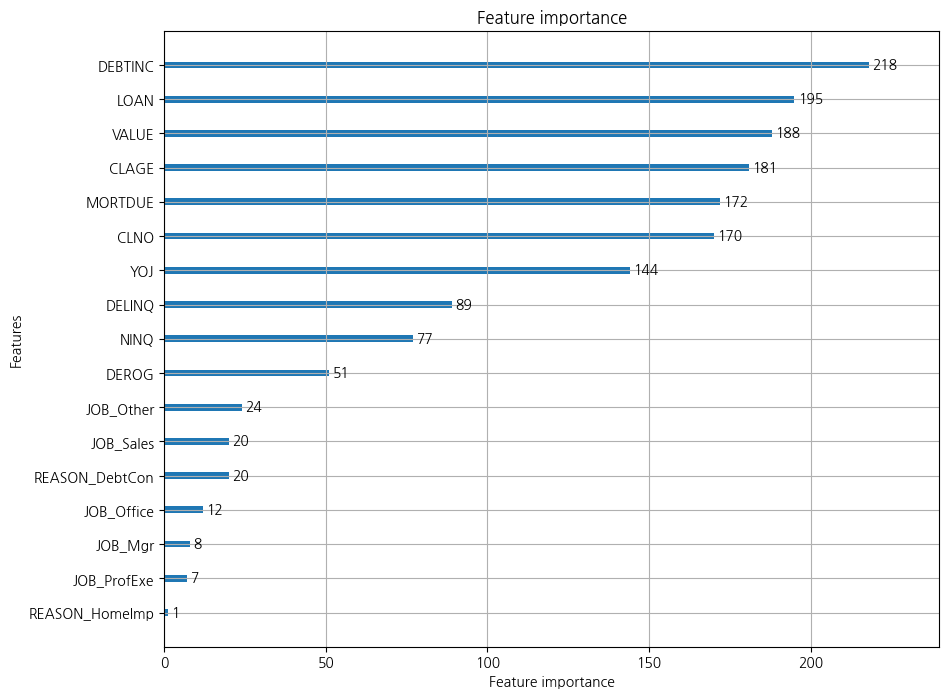

In [70]:
# 변수 중요도 확인 
from lightgbm import plot_importance
print(lgbm_stop.feature_name_)
print(lgbm_stop.feature_importances_)

fig, ax = plt.subplots(figsize=(10, 8))
plot_importance(lgbm_stop, ax=ax)

In [72]:
# 패키지 불러오기 
from catboost import CatBoostClassifier

# 변수 중요도 확인: CatBoost는 plot_importance 함수 미지원

# 분류모델 통합 평가: 혼동행렬, 정확도, 정밀도, 재현율, F1, AUC 등
def eval_class_model(y_test, y_pred):
    confusion = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    F1 = f1_score(y_test, y_pred)
    AUC = roc_auc_score(y_test, y_pred)
    
    print('오차행렬:\n', confusion, '\n')
    print('정확도: {:.4f}'.format(accuracy))
    print('정밀도: {:.4f}'.format(precision))
    print('재현율: {:.4f}'.format(recall))
    print('F1    : {:.4f}'.format(F1))
    print('AUC   : {:.4f}'.format(AUC))

In [73]:
# 기본 모델 지정 및 기본 옵션 확인
cbc_uncust = CatBoostClassifier(random_state=1234)

cbc_uncust.get_all_params

<bound method CatBoost.get_all_params of <catboost.core.CatBoostClassifier object at 0x7fedf8c04fd0>>

In [74]:
# 모델 적합
cbc_uncust.fit(df_train_x, df_train_y)

print('\n 모델 생성 및 평가 : Train \n')
# 예측 및 모델 평가:train  
cbc_pred_train = cbc_uncust.predict(df_train_x)
eval_class_model(df_train_y, cbc_pred_train)

print('\n 모델 생성 및 평가 : Test \n')
# 예측 및 모델 평가:test 
cbc_pred_test = cbc_uncust.predict(df_test_x)
eval_class_model(df_test_y, cbc_pred_test)

Learning rate set to 0.015551
0:	learn: 0.6761244	total: 52.6ms	remaining: 52.5s
1:	learn: 0.6579079	total: 57.1ms	remaining: 28.5s
2:	learn: 0.6399682	total: 60.6ms	remaining: 20.1s
3:	learn: 0.6239700	total: 63.7ms	remaining: 15.9s
4:	learn: 0.6084344	total: 66.6ms	remaining: 13.3s
5:	learn: 0.5945777	total: 69.2ms	remaining: 11.5s
6:	learn: 0.5799344	total: 71.5ms	remaining: 10.1s
7:	learn: 0.5669553	total: 73.9ms	remaining: 9.17s
8:	learn: 0.5532509	total: 76.3ms	remaining: 8.4s
9:	learn: 0.5408740	total: 78.4ms	remaining: 7.76s
10:	learn: 0.5292223	total: 80.3ms	remaining: 7.22s
11:	learn: 0.5169985	total: 82.4ms	remaining: 6.79s
12:	learn: 0.5058216	total: 84.5ms	remaining: 6.41s
13:	learn: 0.4967484	total: 86.5ms	remaining: 6.09s
14:	learn: 0.4867250	total: 88.3ms	remaining: 5.8s
15:	learn: 0.4766792	total: 90.2ms	remaining: 5.55s
16:	learn: 0.4678698	total: 92ms	remaining: 5.32s
17:	learn: 0.4583963	total: 93.8ms	remaining: 5.12s
18:	learn: 0.4496975	total: 95.6ms	remaining: 4.

In [75]:
# 사용자 모델 생성
cbc_user= CatBoostClassifier(n_estimators = 200, learning_rate = 0.1, max_depth = 6, random_state=1234)
# 모델 적합
cbc_user.fit(df_train_x, df_train_y)

# 예측 및 모델 평가:Train  
cbc_pred_train = cbc_user.predict(df_train_x)

print('\n 사용자 모델 평가 : Train \n')
eval_class_model(df_train_y, cbc_pred_train)
print('\n',classification_report(df_train_y, cbc_pred_train))


# 예측 및 모델 평가:Test  
cbc_pred_test = cbc_user.predict(df_test_x)

print('\n 사용자 모델 평가 : Test \n')
eval_class_model(df_test_y, cbc_pred_test)
print('\n',classification_report(df_test_y, cbc_pred_test))

0:	learn: 0.5909199	total: 4.59ms	remaining: 913ms
1:	learn: 0.5032732	total: 11.2ms	remaining: 1.11s
2:	learn: 0.4353241	total: 14.4ms	remaining: 945ms
3:	learn: 0.3862375	total: 17.7ms	remaining: 865ms
4:	learn: 0.3517100	total: 20.5ms	remaining: 798ms
5:	learn: 0.3239240	total: 22.8ms	remaining: 738ms
6:	learn: 0.3018276	total: 25ms	remaining: 690ms
7:	learn: 0.2850184	total: 27.3ms	remaining: 655ms
8:	learn: 0.2697382	total: 29.6ms	remaining: 627ms
9:	learn: 0.2581893	total: 31.6ms	remaining: 601ms
10:	learn: 0.2468526	total: 33.6ms	remaining: 578ms
11:	learn: 0.2364921	total: 35.6ms	remaining: 558ms
12:	learn: 0.2284698	total: 37.7ms	remaining: 542ms
13:	learn: 0.2239990	total: 39.8ms	remaining: 528ms
14:	learn: 0.2174115	total: 41.7ms	remaining: 514ms
15:	learn: 0.2116582	total: 43.5ms	remaining: 501ms
16:	learn: 0.2067886	total: 45.4ms	remaining: 488ms
17:	learn: 0.2039374	total: 47.4ms	remaining: 479ms
18:	learn: 0.1986265	total: 49.3ms	remaining: 469ms
19:	learn: 0.1962122	tot

In [76]:
# CatBoost 모델의 조기 중단:fit( )에 파라미터 입력(early_stopping_rounds, eval_metrics, eval_set.)
# 모델 파라미터 지정:n_estimators, learning_rate, max_depth 등 지정
# 조기 중간 파라미터 지정: early_stopping_rounds 
# 평가지표 지정:logloss

# 모델 성능 평가 데이터
eval_df = [(df_test_x, df_test_y)]

cbc_stop = CatBoostClassifier(n_estimators = 300, learning_rate = 0.1 , max_depth = 6, random_state=1234)

cbc_stop.fit(df_train_x, df_train_y, 
            # 조기 중단 파라미터
             early_stopping_rounds = 150,eval_set = eval_df, verbose=True)
# cbc_stop.fit(df_train_x, df_train_y, 
#             # 조기 중단 파라미터
#              early_stopping_rounds = 150, eval_metric="auto", eval_set = eval_df, 
#              verbose=True)

0:	learn: 0.5909199	test: 0.5906622	best: 0.5906622 (0)	total: 4.37ms	remaining: 1.31s
1:	learn: 0.5032732	test: 0.5053610	best: 0.5053610 (1)	total: 8.19ms	remaining: 1.22s
2:	learn: 0.4353241	test: 0.4377785	best: 0.4377785 (2)	total: 11.8ms	remaining: 1.17s
3:	learn: 0.3862375	test: 0.3906700	best: 0.3906700 (3)	total: 15.3ms	remaining: 1.14s
4:	learn: 0.3517100	test: 0.3599815	best: 0.3599815 (4)	total: 17.9ms	remaining: 1.05s
5:	learn: 0.3239240	test: 0.3335359	best: 0.3335359 (5)	total: 20.4ms	remaining: 1s
6:	learn: 0.3018276	test: 0.3128835	best: 0.3128835 (6)	total: 23.6ms	remaining: 989ms
7:	learn: 0.2850184	test: 0.2972508	best: 0.2972508 (7)	total: 26.1ms	remaining: 953ms
8:	learn: 0.2697382	test: 0.2841419	best: 0.2841419 (8)	total: 28.3ms	remaining: 916ms
9:	learn: 0.2581893	test: 0.2748417	best: 0.2748417 (9)	total: 30.7ms	remaining: 889ms
10:	learn: 0.2468526	test: 0.2659877	best: 0.2659877 (10)	total: 32.9ms	remaining: 866ms
11:	learn: 0.2364921	test: 0.2571756	best: 0

In [77]:
# 최적모델 정보 확인
print("최적 횟수:",cbc_stop.best_iteration_)  
print("최적 성능:",cbc_stop.best_score_)

최적 횟수: 154
최적 성능: {'learn': {'Logloss': 0.019986015048234506}, 'validation': {'Logloss': 0.1748131277362495}}


In [78]:
# 조기 중단 예측 및 모델 평가:Test  
cbc_pred_stop = cbc_stop.predict(df_test_x)

print('\n 조기 중단 모델 평가 : Test \n')
eval_class_model(df_test_y, cbc_pred_stop)
print('\n',classification_report(df_test_y, cbc_pred_stop))


 조기 중단 모델 평가 : Test 

오차행렬:
 [[1021    0]
 [  56   48]] 

정확도: 0.9502
정밀도: 1.0000
재현율: 0.4615
F1    : 0.6316
AUC   : 0.7308

               precision    recall  f1-score   support

           0       0.95      1.00      0.97      1021
           1       1.00      0.46      0.63       104

    accuracy                           0.95      1125
   macro avg       0.97      0.73      0.80      1125
weighted avg       0.95      0.95      0.94      1125



In [79]:
# 변수 중요도 확인 
print(cbc_stop.feature_names_)
print(cbc_stop.feature_importances_)
# print(cbc_stop.get_feature_importance())

['LOAN', 'MORTDUE', 'VALUE', 'YOJ', 'DEROG', 'DELINQ', 'CLAGE', 'NINQ', 'CLNO', 'DEBTINC', 'REASON_DebtCon', 'REASON_HomeImp', 'JOB_Mgr', 'JOB_Office', 'JOB_Other', 'JOB_ProfExe', 'JOB_Sales', 'JOB_Self']
[ 8.48192368 10.1545335   6.99018232 10.55202983  2.79864521  7.93223236
 12.19986926  6.62398258  9.80529685 13.95290347  0.74700744  1.10396813
  1.58618178  1.59255053  2.00890259  2.25362825  1.01649621  0.19966599]


In [80]:
# 변수명
v_feature_name = df_train_x.columns
# tree.feature_importances_로 설명변수 중요도 확인 및 테이블로 저장
df_cbc_importance = pd.DataFrame()
df_cbc_importance ["Feature"] = cbc_stop.feature_names_
df_cbc_importance ["Importance"] = cbc_stop.feature_importances_
# 중요도별로 정렬
df_cbc_importance .sort_values("Importance", ascending=False, inplace = True)
df_cbc_importance .round(3)

,Feature,Importance
9,DEBTINC,13.953
6,CLAGE,12.200
3,YOJ,10.552
1,MORTDUE,10.155
8,CLNO,9.805
0,LOAN,8.482
5,DELINQ,7.932
2,VALUE,6.990
7,NINQ,6.624
4,DEROG,2.799


Text(0, 0.5, '설명변수')

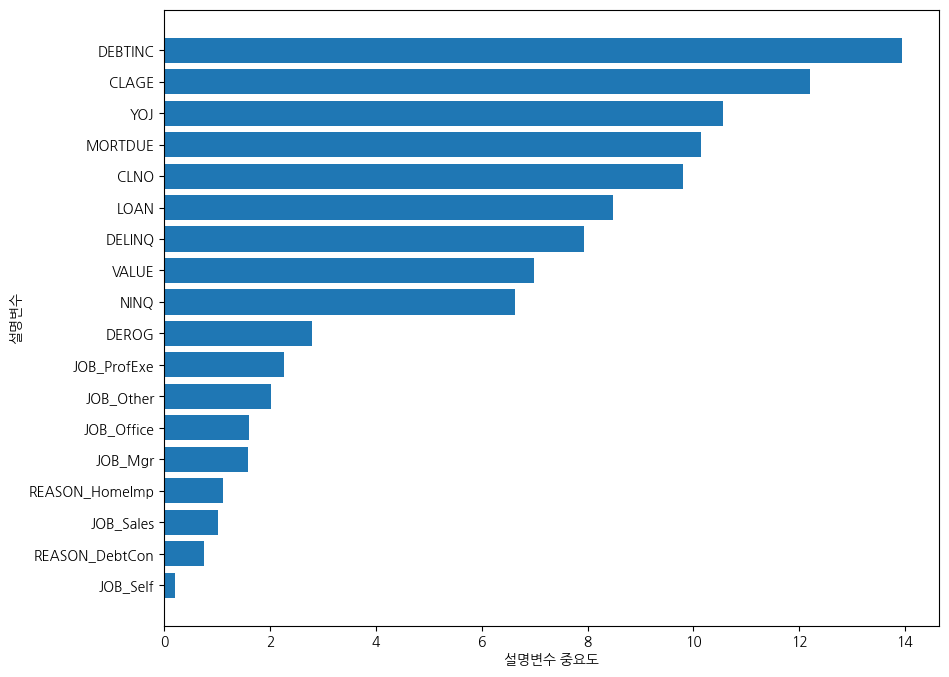

In [81]:
# 설명변수 중요도 그래프
# 중요도가 높은 변수를 상위에 그림 
fig, ax = plt.subplots(figsize=(10, 8))

df_cbc_importance.sort_values("Importance", ascending=True, inplace = True)
coordinates = range(len(df_cbc_importance ))
plt.barh(y = coordinates, width = df_cbc_importance ["Importance"])
plt.yticks(coordinates, df_cbc_importance ["Feature"])
plt.xlabel("설명변수 중요도")
plt.ylabel("설명변수")

## Support Vector Machine

In [82]:
# 데이터 구성:Series, DataFrame
import pandas as pd
import numpy as np
# 데이터 시각화
import matplotlib.pyplot as plt
import matplotlib

# 데이터 scaling
from sklearn.preprocessing import StandardScaler
# 데이터 분할:train, test
from sklearn.model_selection import train_test_split
# 분류 SVM
from sklearn.svm import SVC
# 최적 모델, 파라미터 탐색
from sklearn.model_selection import GridSearchCV

# 분류모델 평가 함수
from sklearn.metrics import accuracy_score, f1_score 
from sklearn.metrics import confusion_matrix, classification_report

In [83]:
plt.rcParams['font.family'] = 'NanumGothic'
matplotlib.rcParams['axes.unicode_minus'] = False

In [84]:
# 데이터 불러오기
df_raw = pd.read_csv("../실습파일/2. Big Data 분석/HMEQ.csv")
df_raw.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1700,30548,40320.0,HomeImp,Other,9.0,0,0.0,101.466002,1.0,8,37.113614
1,1,1800,28502,43034.0,HomeImp,Other,11.0,0,0.0,88.766030,0.0,8,36.884894
2,0,2300,102370,120953.0,HomeImp,Office,2.0,0,0.0,90.992533,0.0,13,31.588503
3,1,2400,34863,47471.0,HomeImp,Mgr,12.0,0,0.0,70.491080,1.0,21,38.263601
4,0,2400,98449,117195.0,HomeImp,Office,4.0,0,0.0,93.811775,0.0,13,29.681827


In [85]:
# Data 구조 확인
print("Data 구조:", df_raw.shape)
print()
print("변수 : ", df_raw.columns)

Data 구조: (3748, 13)

변수 :  Index(['BAD', 'LOAN', 'MORTDUE', 'VALUE', 'REASON', 'JOB', 'YOJ', 'DEROG',
       'DELINQ', 'CLAGE', 'NINQ', 'CLNO', 'DEBTINC'],
      dtype='object')


In [86]:
# 결측치 확인
df_raw.isnull().sum(axis = 0)

BAD          0
LOAN         0
MORTDUE      0
VALUE       14
REASON       0
JOB         81
YOJ        205
DEROG        0
DELINQ      30
CLAGE       37
NINQ        56
CLNO         0
DEBTINC      0
dtype: int64

In [87]:
# fillna: 결측치를 채우는 함수
# JOB 변수의 결측치는 Other로 입력, inplace: fillna 함수 적용 후 ds_hmeq 데이터에 저장, False면 저장 안 함
df_raw["JOB"].fillna("Other", inplace = True)
# 숫자형 변수의 결측치는 해당 변수의 평균값 입력: ds_hmeq.mean() 각 변수별 평균 계산 후 결측치 대체
df_raw.fillna(df_raw.mean(), inplace=True)

/tmp/ipykernel_22821/890471739.py:5: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_raw.fillna(df_raw.mean(), inplace=True)


In [88]:
# 결측치 처리 후 확인
df_raw.isnull().sum()

BAD        0
LOAN       0
MORTDUE    0
VALUE      0
REASON     0
JOB        0
YOJ        0
DEROG      0
DELINQ     0
CLAGE      0
NINQ       0
CLNO       0
DEBTINC    0
dtype: int64

In [89]:
# 목표변수/설명변수 분리
df_raw_x = df_raw.drop("BAD", axis = 1, inplace = False)
df_raw_y = df_raw["BAD"] 

display("설명변수:", df_raw_x.head())
display("목표변수:",df_raw_y.head())

'설명변수:'

,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1700,30548,40320.0,HomeImp,Other,9.0,0,0.0,101.466002,1.0,8,37.113614
1,1800,28502,43034.0,HomeImp,Other,11.0,0,0.0,88.766030,0.0,8,36.884894
2,2300,102370,120953.0,HomeImp,Office,2.0,0,0.0,90.992533,0.0,13,31.588503
3,2400,34863,47471.0,HomeImp,Mgr,12.0,0,0.0,70.491080,1.0,21,38.263601
4,2400,98449,117195.0,HomeImp,Office,4.0,0,0.0,93.811775,0.0,13,29.681827


'목표변수:'

0    1
1    1
2    0
3    1
4    0
Name: BAD, dtype: int64

In [90]:
# 범주형 변수 선택 : select_dtypes="object" 
df_raw_x_char = df_raw_x.select_dtypes(include = "object")
df_raw_x_char.head()

# get_dummies: 범주형 변수에 대한 더미변환 
df_x_dummy = pd.get_dummies(df_raw_x_char)
df_x_dummy.head()

display("Dummy 변환 전:", df_raw_x_char.head())
display("Dummy 변환 후:",df_x_dummy.head())

'Dummy 변환 전:'

,REASON,JOB
0,HomeImp,Other
1,HomeImp,Other
2,HomeImp,Office
3,HomeImp,Mgr
4,HomeImp,Office


'Dummy 변환 후:'

,REASON_DebtCon,REASON_HomeImp,JOB_Mgr,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self
0,0,1,0,0,1,0,0,0
1,0,1,0,0,1,0,0,0
2,0,1,0,1,0,0,0,0
3,0,1,1,0,0,0,0,0
4,0,1,0,1,0,0,0,0


In [91]:
# 연속형 변수 선택 : select_dtypes="object" 제외
df_raw_x_num = df_raw_x.select_dtypes(exclude = "object")
# df_raw_x_num.head()

# 변수명 저장
v_feature_names = df_raw_x_num.columns

# StandardScaler 적용
scaler = StandardScaler()
df_x_scaled = scaler.fit_transform(df_raw_x_num)
df_x_scaled = pd.DataFrame(df_x_scaled, columns=v_feature_names)

display("Scale 변환 전:", df_raw_x_num.head())
display("Scale 변환 후:",df_x_scaled.head())

'Scale 변환 전:'

,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1700,30548,40320.0,9.0,0,0.0,101.466002,1.0,8,37.113614
1,1800,28502,43034.0,11.0,0,0.0,88.766030,0.0,8,36.884894
2,2300,102370,120953.0,2.0,0,0.0,90.992533,0.0,13,31.588503
3,2400,34863,47471.0,12.0,0,0.0,70.491080,1.0,21,38.263601
4,2400,98449,117195.0,4.0,0,0.0,93.811775,0.0,13,29.681827


'Scale 변환 후:'

,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,-1.559587,-0.993626,-1.224910,-0.017563,-0.267462,-0.342558,-0.967342,-0.018776,-1.428350,0.356347
1,-1.550817,-1.039240,-1.174897,0.251809,-0.267462,-0.342558,-1.122053,-0.666629,-1.428350,0.329025
2,-1.506968,0.607570,0.260973,-0.960364,-0.267462,-0.342558,-1.094930,-0.666629,-0.905133,-0.303684
3,-1.498198,-0.897428,-1.093133,0.386495,-0.267462,-0.342558,-1.344679,-0.018776,-0.067985,0.493725
4,-1.498198,0.520156,0.191721,-0.690992,-0.267462,-0.342558,-1.060586,-0.666629,-0.905133,-0.531456


In [92]:
# 설명변수 데이터 결합: scale된 연속형 + dummy된 범주형
df_x_converted = df_x_scaled.join(df_x_dummy)

display("변환 전:", df_raw_x.head())
display("Scale/Dummy 변환 후:",df_x_converted.head())

'변환 전:'

,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1700,30548,40320.0,HomeImp,Other,9.0,0,0.0,101.466002,1.0,8,37.113614
1,1800,28502,43034.0,HomeImp,Other,11.0,0,0.0,88.766030,0.0,8,36.884894
2,2300,102370,120953.0,HomeImp,Office,2.0,0,0.0,90.992533,0.0,13,31.588503
3,2400,34863,47471.0,HomeImp,Mgr,12.0,0,0.0,70.491080,1.0,21,38.263601
4,2400,98449,117195.0,HomeImp,Office,4.0,0,0.0,93.811775,0.0,13,29.681827


'Scale/Dummy 변환 후:'

,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,REASON_DebtCon,REASON_HomeImp,JOB_Mgr,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self
0,-1.559587,-0.993626,-1.224910,-0.017563,-0.267462,-0.342558,-0.967342,-0.018776,-1.428350,0.356347,0,1,0,0,1,0,0,0
1,-1.550817,-1.039240,-1.174897,0.251809,-0.267462,-0.342558,-1.122053,-0.666629,-1.428350,0.329025,0,1,0,0,1,0,0,0
2,-1.506968,0.607570,0.260973,-0.960364,-0.267462,-0.342558,-1.094930,-0.666629,-0.905133,-0.303684,0,1,0,1,0,0,0,0
3,-1.498198,-0.897428,-1.093133,0.386495,-0.267462,-0.342558,-1.344679,-0.018776,-0.067985,0.493725,0,1,1,0,0,0,0,0
4,-1.498198,0.520156,0.191721,-0.690992,-0.267462,-0.342558,-1.060586,-0.666629,-0.905133,-0.531456,0,1,0,1,0,0,0,0


In [93]:
# 변환된 설명변수 데이터 사용:df_x_converted 
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_x_converted, df_raw_y
                                    , test_size = 0.3, random_state = 1234)

print("분할된 Train Data: {}".format(df_train_x.shape))
print("분할된 Test Data: {}".format(df_test_x.shape))

분할된 Train Data: (2623, 18)
분할된 Test Data: (1125, 18)


In [94]:
svm_uncust = SVC(random_state=1234)
svm_uncust.fit(df_train_x, df_train_y)

# train 모델 정확도
print("Train Accuracy : {:.3f}".format(svm_uncust.score(df_train_x, df_train_y)))
# test 모델 정확도
print("Test Accuracy : {:.3f}".format(svm_uncust.score(df_test_x, df_test_y)))

Train Accuracy : 0.945
Test Accuracy : 0.937


In [95]:
# 실행옵션 확인
print(svm_uncust.get_params().keys())
print(svm_uncust.get_params().values())

dict_keys(['C', 'break_ties', 'cache_size', 'class_weight', 'coef0', 'decision_function_shape', 'degree', 'gamma', 'kernel', 'max_iter', 'probability', 'random_state', 'shrinking', 'tol', 'verbose'])
dict_values([1.0, False, 200, None, 0.0, 'ovr', 3, 'scale', 'rbf', -1, False, 1234, True, 0.001, False])


In [96]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []

para_c = [10 **c for c in range(-2, 3)] # 0.01, 0.1, 1, 10, 100 : 큰 변화 영향 확인
# para_c = [0.1 * c for c in range(1, 13)] )] # 0.1~1.0 : 작은 변화 영향 확인

for v_C in para_c:
    svm = SVC(C = v_C, random_state = 1234)
    svm.fit(df_train_x, df_train_y)
    train_accuracy.append(svm.score(df_train_x, df_train_y))
    test_accuracy.append(svm.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_c = pd.DataFrame()
df_accuracy_c["Cost"] = para_c
df_accuracy_c["TrainAccuracy"] = train_accuracy
df_accuracy_c["TestAccuracy"] = test_accuracy

In [97]:
# Cost별 정확도
df_accuracy_c.round(3)

,Cost,TrainAccuracy,TestAccuracy
0,0.01,0.908,0.908
1,0.10,0.908,0.908
2,1.00,0.945,0.937
3,10.00,0.981,0.953
4,100.00,0.996,0.954


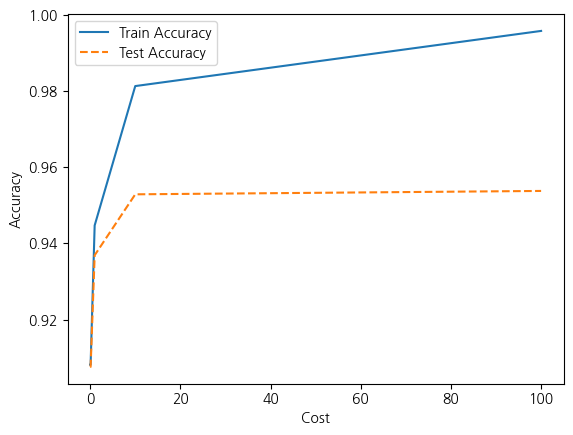

In [98]:
# 정확도 그래프 확인
plt.plot(para_c, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_c, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.ylabel("Accuracy"); plt.xlabel("Cost")
plt.legend()

In [99]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []

# para_c = [10 **c for c in range(-2, 3)] # 0.01, 0.1, 1, 10, 100 : 큰 변화 영향 확인
para_c = [0.1 * c for c in range(1, 13)] # 0.1~1.0 : 작은 변화 영향 확인

for v_C in para_c:
    svm = SVC(C = v_C, random_state = 1234)
    svm.fit(df_train_x, df_train_y)
    train_accuracy.append(svm.score(df_train_x, df_train_y))
    test_accuracy.append(svm.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_c = pd.DataFrame()
df_accuracy_c["Cost"] = para_c
df_accuracy_c["TrainAccuracy"] = train_accuracy
df_accuracy_c["TestAccuracy"] = test_accuracy

In [100]:
# Cost별 정확도
df_accuracy_c.round(3)

,Cost,TrainAccuracy,TestAccuracy
0,0.1,0.908,0.908
1,0.2,0.915,0.910
2,0.3,0.927,0.918
3,0.4,0.932,0.927
4,0.5,0.936,0.929
5,0.6,0.938,0.931
6,0.7,0.939,0.933
7,0.8,0.941,0.936
8,0.9,0.942,0.936
9,1.0,0.945,0.937


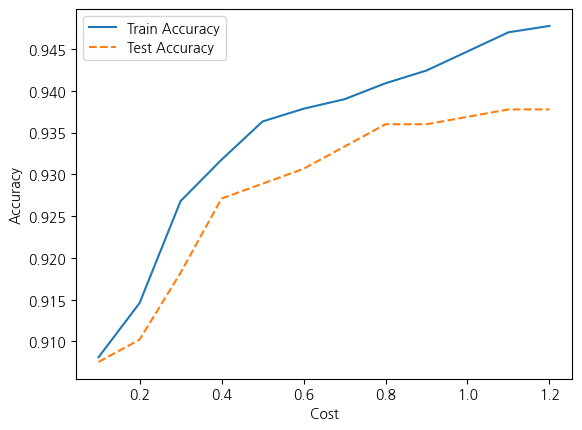

In [101]:
# 정확도 그래프 확인
plt.plot(para_c, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_c, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.ylabel("Accuracy"); plt.xlabel("Cost")
plt.legend()

In [102]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []

para_gamma = [10 **gamma for gamma in range(-2, 3)]   # 0.01, 0.1, 1, 10, 100 : 큰 변화 영향 확인
# para_gamma = [0.1 * gamma for gamma in range(1, 11)]     # 0.1~1.0 : 작은 변화 영향 확인

for v_gamma in para_gamma:
    svm = SVC(gamma = v_gamma, C = 0.8, random_state = 1234)
    svm.fit(df_train_x, df_train_y)
    train_accuracy.append(svm.score(df_train_x, df_train_y))
    test_accuracy.append(svm.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_gamma = pd.DataFrame()
df_accuracy_gamma["gamma"] = para_gamma
df_accuracy_gamma["TrainAccuracy"] = train_accuracy
df_accuracy_gamma["TestAccuracy"] = test_accuracy

In [103]:
# Gamma별 정확도
df_accuracy_gamma.round(4)

,gamma,TrainAccuracy,TestAccuracy
0,0.01,0.9211,0.9191
1,0.10,0.9443,0.9369
2,1.00,0.9901,0.9164
3,10.00,0.9226,0.9076
4,100.00,0.9081,0.9076


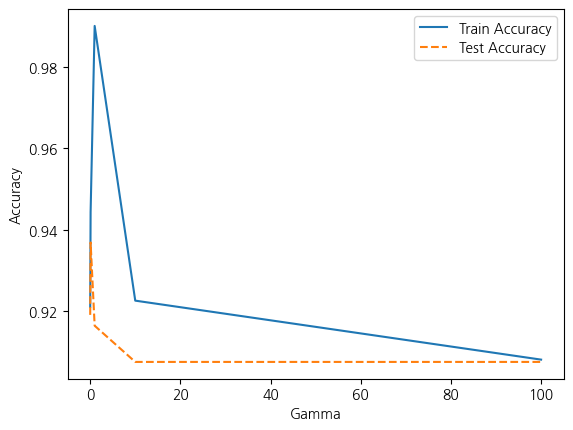

In [104]:
# 모델 정확도 그래프 확인
plt.plot(para_gamma, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_gamma, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.ylabel("Accuracy"); plt.xlabel("Gamma")  # X 축 범위 log 변환
plt.legend()

In [105]:
# Gamma 미세 변화에 따른 모델 성능
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []

# para_gamma = [10 **gamma for gamma in range(-2, 3)]   # 0.01, 0.1, 1, 10, 100 : 큰 변화 영향 확인
para_gamma = [0.1 * gamma for gamma in range(1, 11)]     # 0.1~1.0 : 작은 변화 영향 확인

for v_gamma in para_gamma:
    svm = SVC(gamma = v_gamma, C = 0.8, random_state = 1234)
    svm.fit(df_train_x, df_train_y)
    train_accuracy.append(svm.score(df_train_x, df_train_y))
    test_accuracy.append(svm.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_gamma = pd.DataFrame()
df_accuracy_gamma["gamma"] = para_gamma
df_accuracy_gamma["TrainAccuracy"] = train_accuracy
df_accuracy_gamma["TestAccuracy"] = test_accuracy

In [106]:
# Gamma별 정확도
df_accuracy_gamma.round(4)

,gamma,TrainAccuracy,TestAccuracy
0,0.1,0.9443,0.9369
1,0.2,0.9638,0.9396
2,0.3,0.9745,0.9307
3,0.4,0.9802,0.9271
4,0.5,0.9828,0.9227
5,0.6,0.9836,0.9200
6,0.7,0.9844,0.9191
7,0.8,0.9867,0.9182
8,0.9,0.9882,0.9173
9,1.0,0.9901,0.9164


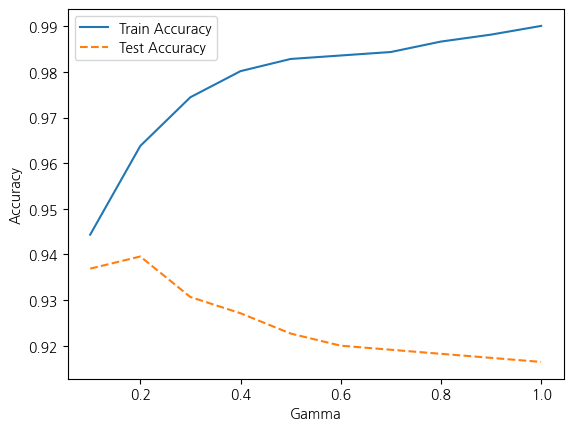

In [107]:
# 모델 정확도 그래프 확인
plt.plot(para_gamma, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_gamma, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.ylabel("Accuracy"); plt.xlabel("Gamma")  # X 축 범위 log 변환
plt.legend()

In [108]:
# 최종 모델
svc_final = SVC(gamma=0.2, C=0.8, random_state=1234)
svc_final.fit(df_train_x, df_train_y)

# 평가
y_pred = svc_final.predict(df_test_x)

# train 모델 정확도
print("Train Accucary : {:.3f}".format(svc_final.score(df_train_x, df_train_y)))
# test 모델 정확도
print("Test Accuracy : {:.3f}\n".format(svc_final.score(df_test_x, df_test_y)))
# confusion matrix
print("Test Confusion matrix: \n{}".format(confusion_matrix(df_test_y, y_pred)))

# 목표변수의 빈도 불균형 : f1 score로 모델 평가 
print(classification_report(df_test_y, y_pred, digits=3))

Train Accucary : 0.964
Test Accuracy : 0.940

Test Confusion matrix: 
[[1021    0]
 [  68   36]]
              precision    recall  f1-score   support

           0      0.938     1.000     0.968      1021
           1      1.000     0.346     0.514       104

    accuracy                          0.940      1125
   macro avg      0.969     0.673     0.741      1125
weighted avg      0.943     0.940     0.926      1125

